# <center> ProSpace Assignment </center>

### <center> Shikhar Kunal Verma </center>




## Importing libraries and loading dataset

In [8]:
from backtesting import Backtester
import pandas as pd
import numpy as np

data = pd.read_csv('./asset_1.csv')

data.head()


,serial_num,price,alpha
0,0,18105.300781,0.000000
1,1,18398.960605,-0.630291
2,2,18204.939538,-0.123420
3,3,18339.357782,-0.240239
4,4,18578.084798,-0.612625


## Checking for NaN values

In [9]:
nan_count = data.isna().sum()
print(nan_count)

serial_num    0
price         0
alpha         0
dtype: int64


## Plotting the price vs serial num


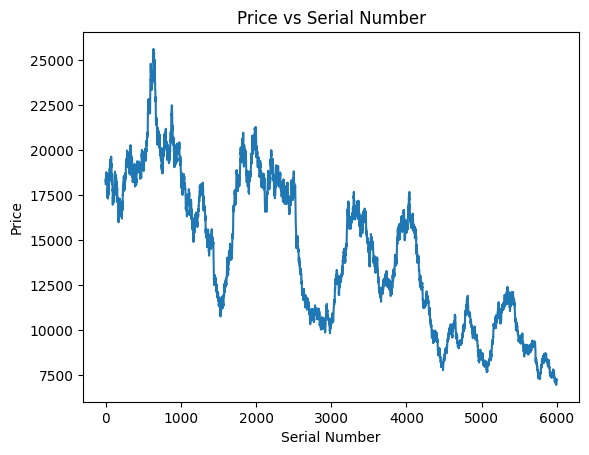

In [10]:
import matplotlib.pyplot as plt

plt.plot(data['serial_num'], data['price'])
plt.xlabel('Serial Number')
plt.ylabel('Price')
plt.title('Price vs Serial Number')
plt.show()

## Using the backtester class to find PnL 

In [11]:

backtester = Backtester(data)

# Run backtest
backtester.run()

# Print results
print("Final balance:", backtester.current_balance)

Final balance: 22307.25236273537


# Optimisation

We'll be using grid search to find the best set of thresholds

In [13]:
def grid_search(data):
    best_pnl = -np.inf
    best_params = None
    long_range = np.arange(0.0, 1.5, 0.1)
    liquidate_range = np.arange(-0.5, 0.6, 0.1)
    short_range = np.arange(-1.5, 0, 0.1)

    for long_thresh in long_range:
        for liquidate_thresh in liquidate_range:
            for short_thresh in short_range:
                if long_thresh < liquidate_thresh or liquidate_thresh < short_thresh:
                    continue
                bt = Backtester(data, long_threshold=long_thresh, liquidate_threshold=liquidate_thresh, short_threshold=short_thresh)
                bt.run()
                pnl = bt.current_balance
                if pnl > best_pnl:
                    best_pnl = pnl
                    best_params = (long_thresh, liquidate_thresh, short_thresh)
    
    return best_params, best_pnl

### Best set of thresholds and best PnL

In [14]:
best_params, best_pnl = grid_search(data)
print("Best params:", best_params)
print("Best PnL:", best_pnl)

Best params: (0.5, 0.3999999999999998, -0.19999999999999885)
Best PnL: 32509.66882904064


## PnL if we take some arbitrary thresholds

In [16]:
bt = Backtester(data, long_threshold=0.6, liquidate_threshold=0.1, short_threshold=-0.6)
bt.run()
pnl = bt.current_balance
pnl

20231.509762371632